### Ручная реализация регрессии с минимизацией MAE с субградиентным спуском, StandardScaler и учётом bias ###

Итерация    0 | MAE: 2.4183 | lr: 0.50000
Итерация  200 | MAE: 0.8041 | lr: 0.03527
Итерация  400 | MAE: 0.8041 | lr: 0.02497
Итерация  600 | MAE: 0.8041 | lr: 0.02040
Итерация  800 | MAE: 0.8041 | lr: 0.01767
Итерация 1000 | MAE: 0.8041 | lr: 0.01580
Итерация 1200 | MAE: 0.8041 | lr: 0.01443
Итерация 1400 | MAE: 0.8041 | lr: 0.01336
Итерация 1600 | MAE: 0.8041 | lr: 0.01250
Итерация 1800 | MAE: 0.8041 | lr: 0.01178
 Достигнуто max_iter=2000. Финальный MAE: 0.8041

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ
Оптимальные веса (включая bias): [-0.30923021  2.10839479 -1.36167457]
Истинные веса (без bias):        [ 2.5 -1.3]
Финальный MAE:                   0.8041
Число итераций:                  2000

ПРЕДСКАЗАНИЯ
X_test:
[[ 1.  2.]
 [ 0. -1.]]
y_pred: [-0.2422587   1.39345517]


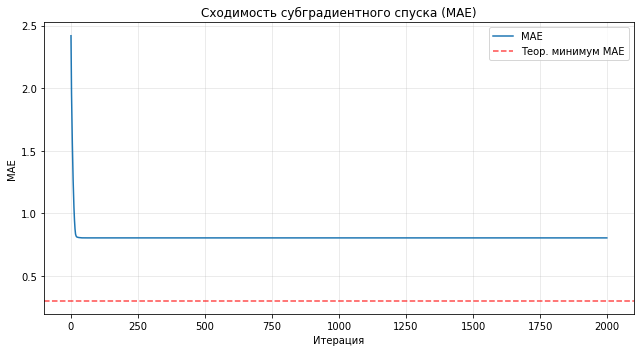

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def subgradient_descent_mae(X, y, lr=0.5, max_iter=2000, tol=1e-4, verbose=False):
    """
    Субградиентный спуск для минимизации MAE с нормализацией и bias.
    
    Параметры:
    X : (n_samples, n_features)
    y : (n_samples,)
    lr : начальная скорость обучения
    max_iter : макс. число итераций
    tol : критерий остановки по изменению весов
    verbose : выводить ли сообщения
    
    Возвращает:
    w : веса [b, w1, w2, ...] (включая bias)
    losses : история значений MAE
    scaler : объект StandardScaler
    """
    n_samples, n_features = X.shape
    
    # Нормализуем признаки
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Добавляем bias
    X_with_bias = np.c_[np.ones(n_samples), X_scaled]
    
    # Инициализация весов
    w = np.zeros(n_features + 1)
    losses = []
    
    for i in range(max_iter):
        y_pred = X_with_bias @ w
        errors = y - y_pred
        mae = np.mean(np.abs(errors))
        losses.append(mae)
        
        # Субградиент
        subgrad_per_sample = -X_with_bias * np.sign(errors).reshape(-1, 1)
        subgrad = np.mean(subgrad_per_sample, axis=0)
        
        # Адаптивный learning rate (подходит для недифференцируемых функций, где нет градиента, но есть субградиент))
        lr_adapt = lr / np.sqrt(i + 1)
        
        # Обновляем веса
        w_new = w - lr_adapt * subgrad
        
        # Лог каждые 200 итераций
        if verbose and i % 200 == 0:
            print(f"Итерация {i:4d} | MAE: {mae:.4f} | lr: {lr_adapt:.5f}")
        
        # Проверяем сходимость
        if np.linalg.norm(w_new - w) < tol:
            if verbose:
                print(f" Сошлось за {i+1} итераций. Финальный MAE: {mae:.4f}")
            w = w_new
            break
        
        w = w_new
    else:
        if verbose:
            print(f" Достигнуто max_iter={max_iter}. Финальный MAE: {losses[-1]:.4f}")
    
    return w, losses, scaler


np.random.seed(42)
n_samples, n_features = 100, 2

X = np.random.randn(n_samples, n_features)
true_w = np.array([2.5, -1.3])
y_true = X @ true_w + np.random.laplace(0, 0.5, n_samples)

# Добавим выбросы
outliers = np.random.choice(n_samples, size=5, replace=False)
y_true[outliers] += np.random.randn(5) * 10


w_opt, losses, scaler = subgradient_descent_mae(
    X, y_true, lr=0.5, max_iter=2000, tol=1e-4, verbose=True
)


print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ")
print("="*50)
print(f"Оптимальные веса (включая bias): {w_opt}")
print(f"Истинные веса (без bias):        {true_w}")
print(f"Финальный MAE:                   {losses[-1]:.4f}")
print(f"Число итераций:                  {len(losses)}")


def predict(X_new, w, scaler):
    X_new_scaled = scaler.transform(X_new)
    X_new_with_bias = np.c_[np.ones(X_new_scaled.shape[0]), X_new_scaled]
    return X_new_with_bias @ w

X_test = np.array([[1.0, 2.0], [0.0, -1.0]])
y_pred = predict(X_test, w_opt, scaler)

print("\nПРЕДСКАЗАНИЯ")
print(f"X_test:\n{X_test}")
print(f"y_pred: {y_pred}")

plt.figure(figsize=(9, 5))
plt.plot(losses, label="MAE")
plt.axhline(y=np.median(np.abs(y_true - X @ true_w)), color='r', linestyle='--', alpha=0.7, label="Теор. минимум MAE")
plt.title("Сходимость субградиентного спуска (MAE)")
plt.xlabel("Итерация")
plt.ylabel("MAE")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
## повертим для улучшений

Итерация    0 | MAE: 2.3254 | lr: 0.07000
 Ранняя остановка на итерации 110. MAE стагнирует. Финальный MAE: 0.5453
РЕЗУЛЬТАТЫ ОБУЧЕНИЯ
Оптимальные веса (включая bias): [-0.32426154  2.123123   -1.32119093]
Истинные веса (без bias):        [ 2.5 -1.3]
Финальный MAE:                   0.5453
Число итераций:                  110

ПРЕДСКАЗАНИЯ
X_test:
[[ 1.  2.]
 [ 0. -1.]]
y_pred: [-0.15792384  1.33830155]


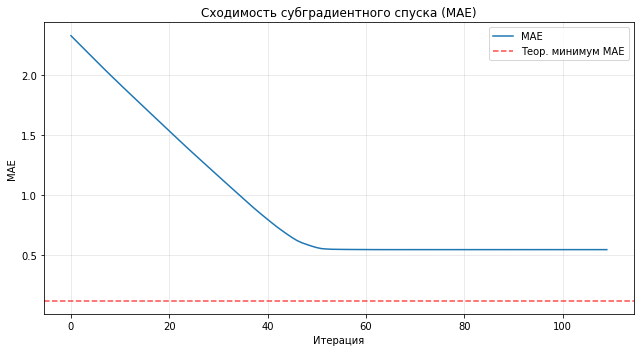

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def subgradient_descent_mae(X, y, lr=0.3, max_iter=5000, tol_w=1e-4, tol_loss=1e-4, patience=200, verbose=False):
    """
    Субградиентный спуск для минимизации MAE с early stopping и улучшенным schedule lr.
    
    Параметры:
    X : (n_samples, n_features)
    y : (n_samples,)
    lr : начальная скорость обучения
    max_iter : макс. число итераций
    tol_w : порог для изменения весов (сходимость)
    tol_loss : порог для изменения MAE (early stopping)
    patience : сколько итераций ждать после улучшения MAE
    verbose : выводить ли сообщения
    
    Возвращает:
    w : веса [b, w1, w2, ...] (включая bias)
    losses : история значений MAE
    scaler : объект StandardScaler
    """
    n_samples, n_features = X.shape
    
    # Нормализуем признаки
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Добавляем bias
    X_with_bias = np.c_[np.ones(n_samples), X_scaled]
    
    # Инициализация весов
    w = np.zeros(n_features + 1)
    losses = []
    
    best_loss = np.inf
    patience_counter = 0  # счётчик без улучшений
    
    for i in range(max_iter):
        y_pred = X_with_bias @ w
        errors = y - y_pred
        mae = np.mean(np.abs(errors))
        losses.append(mae)
        
        # Субградиент
        subgrad_per_sample = -X_with_bias * np.sign(errors).reshape(-1, 1)
        subgrad = np.mean(subgrad_per_sample, axis=0)
        
        # Улучшенный adaptive lr: медленнее уменьшается
        lr_adapt = lr / (1 + i / 1000)  # медленнее, чем 1/sqrt(i)
        
        # Обновляем веса
        w_new = w - lr_adapt * subgrad
        
        # Лог каждые 200 итераций
        if verbose and i % 200 == 0:
            print(f"Итерация {i:4d} | MAE: {mae:.4f} | lr: {lr_adapt:.5f}")
        
        # Критерий 1: сходимость по весам
        if np.linalg.norm(w_new - w) < tol_w:
            if verbose:
                print(f"Сошлось по весам за {i+1} итераций. Финальный MAE: {mae:.4f}")
            w = w_new
            break
        
        # Критерий 2: early stopping по стагнации MAE
        if mae < best_loss - tol_loss:
            best_loss = mae
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            if verbose:
                print(f" Ранняя остановка на итерации {i+1}. MAE стагнирует. Финальный MAE: {mae:.4f}")
            w = w_new
            break
        
        w = w_new
    else:
        if verbose:
            print(f" Достигнуто max_iter={max_iter}. Финальный MAE: {losses[-1]:.4f}")
    
    return w, losses, scaler


np.random.seed(42)
n_samples, n_features = 100, 2

X = np.random.randn(n_samples, n_features)
true_w = np.array([2.5, -1.3])
y_true = X @ true_w + np.random.laplace(0, 0.2, n_samples)

# Добавим выбросы
outliers = np.random.choice(n_samples, size=5, replace=False)
y_true[outliers] += np.random.randn(5) * 10


w_opt, losses, scaler = subgradient_descent_mae(
    X, y_true,
    lr=0.07,           # меньше lr → стабильнее
    max_iter=5000,     # можно больше, т.к. есть early stopping
    tol_w=1e-3,
    tol_loss=1e-3,
    patience=50,       # ждём 50 итераций 
    verbose=True
)


print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ")
print(f"Оптимальные веса (включая bias): {w_opt}")
print(f"Истинные веса (без bias):        {true_w}")
print(f"Финальный MAE:                   {losses[-1]:.4f}")
print(f"Число итераций:                  {len(losses)}")


def predict(X_new, w, scaler):
    X_new_scaled = scaler.transform(X_new)
    X_new_with_bias = np.c_[np.ones(X_new_scaled.shape[0]), X_new_scaled]
    return X_new_with_bias @ w

X_test = np.array([[1.0, 2.0], [0.0, -1.0]])
y_pred = predict(X_test, w_opt, scaler)

print("\nПРЕДСКАЗАНИЯ")
print(f"X_test:\n{X_test}")
print(f"y_pred: {y_pred}")

plt.figure(figsize=(9, 5))
plt.plot(losses, label="MAE")
plt.axhline(y=np.median(np.abs(y_true - X @ true_w)), color='r', linestyle='--', alpha=0.7, label="Теор. минимум MAE")
plt.title("Сходимость субградиентного спуска (MAE)")
plt.xlabel("Итерация")
plt.ylabel("MAE")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()